# Houston Food Delivery App_Capstone Project_Shanshan Bai

# Start by creating a notebook 

In [3]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

#scrape table by BeautifulSoup
from urllib.request import urlopen
from bs4 import BeautifulSoup
import ssl
import csv
print('libary & BeautifulSoup & csv installed')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

libary & BeautifulSoup & csv installed


# part 1- Great Houston Area Household Income 

## 1-1 Collect income and zip code data 

In [5]:
# download income arranged by zip codes from http://www.houstonstateofhealth.com/indicators/index/indicatorcsv?indicatorId=315&localeTypeId=3&localeFilterId=0
income=pd.read_csv('/Users/shanshanbai/Downloads/Houston_income.csv')
income.head()

,Indicator Name,What Is This Indicator,Location Type,Location,Indicator Rate Value,Indicator Rate Value Units,Rate Lower Confidence Interval,Rate Upper Confidence Interval,Indicator Count Value,Indicator Count Value Units,...,Breakout Rate Value,Breakout Rate Value Units,Breakout Rate Lower Confidence Interval,Breakout Rate Upper Confidence Interval,Breakout Count Value,Breakout Count Value Units,Breakout Count Lower Confidence Interval,Breakout Count Upper Confidence Interval,Breakout Unstable,Breakout Footer
0,Median Household Income,This indicator shows the median household inco...,Zip Code,77002,67043,dollars,59927,74159,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Median Household Income,This indicator shows the median household inco...,Zip Code,77002,72306,dollars,65002,79610,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Median Household Income,This indicator shows the median household inco...,Zip Code,77002,68229,dollars,58198,78260,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Median Household Income,This indicator shows the median household inco...,Zip Code,77002,62089,dollars,51992,72186,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Median Household Income,This indicator shows the median household inco...,Zip Code,77002,71319,dollars,57900,84738,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#clean data and we only use zip code and median income
df_inc = pd.DataFrame(income, columns=['Location', 'Indicator Rate Value'])
df_inc.head()


,Location,Indicator Rate Value
0,77002,67043
1,77002,72306
2,77002,68229
3,77002,62089
4,77002,71319


In [50]:
#groupby zip code and get the median income from the same zip code
df_mean=df_inc.groupby('Location').median()
df1=df_mean.rename(columns={'Location':'Zip', 'Indicator Rate Value':'income_med'})
df1.index.rename('Zip',inplace=True)
df1.head()


,income_med
Zip,
77002,66909.5
77003,39843.0
77004,46791.0
77005,165002.5
77006,70333.0


## 1-2 Collect top10 household income and zip code data 

In [51]:
#check top 10 income zip code 
df_top10=df1.sort_values(['income_med'], ascending=False, axis=0).head(10)
df_top10

,income_med
Zip,
77010,209063.0
77005,165002.5
77401,158378.0
77094,158279.0
77059,131796.5
77345,123835.5
77024,114279.5
77007,106812.0
77389,103821.5


# Part 2 - Get the latitude and the longitude coordinates of each zip code

In [38]:
#download data from https://public.opendatasoft.com/explore/dataset/us-zip-code-latitude-and-longitude/table/?refine.state=TX&q=houston
#save Houston data as 'Houston-zip-code-latitude-and-longitude.csv'
GeoHo=pd.read_csv('/Users/shanshanbai/Downloads/Houston-zip-code-latitude-and-longitude.csv')
GeoHo.head()

,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,77046,Houston,TX,29.733181,-95.431310,-6,1,"29.733181,-95.43131"
1,77015,Houston,TX,29.778526,-95.181180,-6,1,"29.778526,-95.18118"
2,77289,Houston,TX,29.833990,-95.434241,-6,1,"29.83399,-95.434241"
3,77072,Houston,TX,29.700898,-95.590020,-6,1,"29.700898,-95.59002"
4,77216,Houston,TX,29.833990,-95.434241,-6,1,"29.83399,-95.434241"


In [39]:
#clean data
GeoHo1 = pd.DataFrame(GeoHo, columns=['Zip', 'Latitude','Longitude'])
GeoHo1.head()

,Zip,Latitude,Longitude
0,77046,29.733181,-95.431310
1,77015,29.778526,-95.181180
2,77289,29.833990,-95.434241
3,77072,29.700898,-95.590020
4,77216,29.833990,-95.434241


## 2-1 Merge income and latitude and the longitude coordinates of each zip code

In [89]:
merged_1 = pd.merge(left=df1, right=GeoHo1, left_on='Zip', right_on='Zip')
merged_1.head()

,Zip,income_med,Latitude,Longitude
0,77002,66909.5,29.755578,-95.36531
1,77003,39843.0,29.749278,-95.34741
2,77004,46791.0,29.728779,-95.36570
3,77005,165002.5,29.717529,-95.42821
4,77006,70333.0,29.741878,-95.38944


In [91]:
merged_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Zip         96 non-null     int64  
 1   income_med  96 non-null     float64
 2   Latitude    96 non-null     float64
 3   Longitude   96 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 3.8 KB


# Part 3- Get Zip Code and Population Data and Merge to Income/Coordinates Data

In [666]:
#Get zip code and population data from http://zipatlas.com/us/tx/houston/zip-code-comparison/population-density.htm
#download .csv 
pop=pd.read_csv('/Users/shanshanbai/Downloads/Zip_population1.csv')
pop.head()

,Zip,Location,City,Population,People / Sq. Mile,National Rank,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,Unnamed: 126,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140,Unnamed: 141,Unnamed: 142,Unnamed: 143,Unnamed: 144,Unnamed: 145,Unnamed: 146,Unnamed: 147,Unnamed: 148,Unnamed: 149,Unnamed: 150,Unnamed: 151,Unnamed: 152,Unnamed: 153,Unnamed: 154,Unnamed: 155,Unnamed: 156,Unnamed: 157,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,Unnamed: 172,Unnamed: 173,Unnamed: 174,Unnamed: 175,Unnamed: 176,Unnamed: 177,Unnamed: 178,Unnamed: 179,Unnamed: 180,Unnamed: 181,Unnamed: 182,Unnamed: 183,Unnamed: 184,Unnamed: 185,Unnamed: 186,Unnamed: 187,Unnamed: 188,Unnamed: 189,Unnamed: 190,Unnamed: 191,Unnamed: 192,Unnamed: 193,Unnamed: 194,Unnamed: 195,Unnamed: 196,Unnamed: 197,Unnamed: 198,Unnamed: 199,Unnamed: 200,Unnamed: 201,Unnamed: 202,Unnamed: 203,Unnamed: 204,Unnamed: 205,Unnamed: 206,Unnamed: 207,Unnamed: 208,Unnamed: 209,Unnamed: 210,Unnamed: 211,Unnamed: 212,Unnamed: 213,Unnamed: 214,Unnamed: 215,Unnamed: 216,Unnamed: 217,Unnamed: 218,Unnamed: 219,Unnamed: 220,Unnamed: 221,Unnamed: 222,Unnamed: 223,Unnamed: 224,Unnamed: 225,Unnamed: 226,Unnamed: 227,Unnamed: 228,Unnamed: 229,Unnamed: 230,Unnamed: 231,Unnamed: 232,Unnamed: 233,Unnamed: 234,Unnamed: 235,Unnamed: 236,Unnamed: 237,Unnamed: 238,Unnamed: 239,Unnamed: 240,Unnamed: 241,Unnamed: 242,Unnamed: 243,Unnamed: 244,Unnamed: 245,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255
0,77046,"29.733084, -95.430659","Houston, Texas",471.0,32343.09,#108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [667]:
#clean data
pop1 = pd.DataFrame(pop, columns=['Zip', 'Population','People / Sq. Mile'])
pop1.head()

,Zip,Population,People / Sq. Mile
0,77046,471.0,32343.09
1,77081,49691.0,15758.06
2,77036,76146.0,9851.11
3,77006,18875.0,8443.44
4,77057,35491.0,8037.23


In [668]:
merged_inner=pd.merge(left=merged_1, right=pop1, left_on='Zip', right_on='Zip')
merged_inner.head()

,Zip,income_med,Latitude,Longitude,Population,People / Sq. Mile
0,77002,66909.5,29.755578,-95.36531,13289.0,6245.28
1,77003,39843.0,29.749278,-95.34741,9195.0,3533.01
2,77004,46791.0,29.728779,-95.36570,30379.0,4980.71
3,77005,165002.5,29.717529,-95.42821,23338.0,6009.48
4,77006,70333.0,29.741878,-95.38944,18875.0,8443.44


In [53]:
# Explore the neighborhoods in Houston from Foursquare
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


# Part 4- Visualization of Zip Code and Population Data and Income Data

## 4-1 Map all great Houstson zip codes with folium

In [58]:
!conda install -c conda-forge folium=0.5.0 

Solving environment: done

# All requested packages already installed.



In [179]:
import pandas as pd
import folium

print('imported pandas & folium')

imported pandas & folium


In [180]:
address = 'Houston, Tx'

geolocator = Nominatim(user_agent="TX_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Houston are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Houston are 29.7589382, -95.3676974.


In [670]:
# create map of Houston using latitude and longitude values
map_Houston_neighbourhoods = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for Zip, income, lat, lng in zip(merged_inner['Zip'],merged_inner['income_med'], merged_inner['Latitude'], merged_inner['Longitude']):
    label = '{}, {}'.format(Zip, income)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Houston_neighbourhoods)  
    
map_Houston_neighbourhoods



## 4-2 Map income top10 zip codes with folium

### 4-2-1 Create a new dataframe of the top 10 income data

In [671]:
top10 = merged_inner.sort_values(['income_med'], ascending=False, axis=0).head(10).reset_index(drop=True)
top10.head(10)


,Zip,income_med,Latitude,Longitude,Population,People / Sq. Mile
0,77010,209063.0,29.754728,-95.36216,76.0,1158.45
1,77005,165002.5,29.717529,-95.42821,23338.0,6009.48
2,77094,158279.0,29.770722,-95.69880,7779.0,588.84
3,77059,131796.5,29.601776,-95.11734,16690.0,1130.03
4,77024,114279.5,29.773994,-95.51771,32746.0,2784.79
5,77007,106812.0,29.772627,-95.40319,22497.0,2605.95
6,77079,99212.0,29.773018,-95.60125,30887.0,4534.87
7,77019,97070.5,29.752528,-95.39923,15640.0,5154.33
8,77056,93106.0,29.747328,-95.46931,14031.0,4023.24
9,77095,89572.5,29.896656,-95.64842,39275.0,2615.11


In [672]:
address = 'HOuston, TX'

geolocator = Nominatim(user_agent="Tx_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Houston are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Houston are 29.7589382, -95.3676974.


### 4-2-2 Map top10 income zip codes


In [673]:
#create map of Houston top10 income zip code using latitude and longitude values
map_top10 = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for Zip, income, lat, lng, population in zip(top10['Zip'],top10['income_med'], top10['Latitude'], top10['Longitude'], top10['Population']):
    label = 'Zip code:{}, Income:{}, Population:{}'.format(Zip,income,population)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_top10)  
    
map_top10

### 4-2-3 plot income, population density in top 10 income zip 

In [649]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.1.3


In [724]:
norm_po = (top10['People / Sq. Mile'] - top10['People / Sq. Mile'].min()) / (top10['People / Sq. Mile'].max() - top10['People / Sq. Mile'].min())

[Text(0, 0, '77005'),
 Text(0, 0, '77007'),
 Text(0, 0, '77010'),
 Text(0, 0, '77019'),
 Text(0, 0, '77024'),
 Text(0, 0, '77056'),
 Text(0, 0, '77059'),
 Text(0, 0, '77079'),
 Text(0, 0, '77094'),
 Text(0, 0, '77095')]

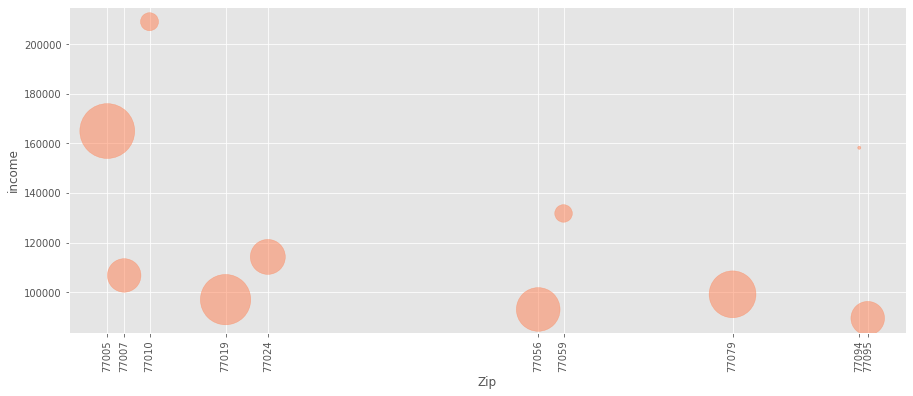

In [725]:
ax0 = top10.plot(kind='scatter',
                    x='Zip',
                    y='income_med',
                    figsize=(15, 6),
                    alpha=0.5,                  # transparency
                    color='coral',
                    s=norm_po * 3000 + 10,  # pass in weights 
                    
                   )

ax0.set_xlabel('Zip')
ax0.set_ylabel('income')
ax0.set_xticks([77005,77007,77010,77019,77024,77056,77059,77079,77094,77095])
xlabel=(77005,77007,77010,77019,77024,77056,77059,77079,77094,77095)
ax0.set_xticklabels(xlabel, rotation= 90)

# Part 5- Collecting Restaurants Data from Foursquare

## 5-1 Load Foursquare API 

In [324]:
CLIENT_ID = 'P4SSQQPEZFI0CT0MFTVLA2IPAXGBMWJHBH2HAZQLJ5ZZ2XNU' # your Foursquare ID
CLIENT_SECRET = 'DFPRFOIDHY4URZQU4EB4QAKWJFUWPAHFJPR4E3J12S3EBQCW' # your Foursquare Secret
VERSION = '20200720' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: P4SSQQPEZFI0CT0MFTVLA2IPAXGBMWJHBH2HAZQLJ5ZZ2XNU
CLIENT_SECRET:DFPRFOIDHY4URZQU4EB4QAKWJFUWPAHFJPR4E3J12S3EBQCW


In [617]:
## check the highest income
top10.loc[0, 'income_med']

209063.0

## 5-2 set the highest income zip code as center to collect data from Foursquare API

In [326]:
neighborhood_latitude = top10.loc[0, 'Latitude'] #  latitude value
neighborhood_longitude = top10.loc[0, 'Longitude'] #  longitude value

neighborhood_name = top10.loc[0, 'Zip'] # name
search_query = 'restaurant'

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))


Latitude and longitude values of 77010 are 29.754728000000004, -95.36216.


In [327]:
radius = 50000
LIMIT = 500
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, 
    CLIENT_SECRET, neighborhood_latitude, 
    neighborhood_longitude, VERSION, search_query, radius, 
    LIMIT)
url


'https://api.foursquare.com/v2/venues/search?client_id=P4SSQQPEZFI0CT0MFTVLA2IPAXGBMWJHBH2HAZQLJ5ZZ2XNU&client_secret=DFPRFOIDHY4URZQU4EB4QAKWJFUWPAHFJPR4E3J12S3EBQCW&ll=29.754728000000004,-95.36216&v=20200720&query=restaurant&radius=50000&limit=500'

In [328]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f1575330b11231648b0fd7b'},
 'response': {'venues': [{'id': '4cc379573d7fa1cd4f08a65f',
    'name': 'Spindletop Restaurant at Hyatt Regency Houston',
    'location': {'address': '1200 Louisiana St',
     'crossStreet': 'Polk',
     'lat': 29.756949047209694,
     'lng': -95.36909651778885,
     'labeledLatLngs': [{'label': 'display',
       'lat': 29.756949047209694,
       'lng': -95.36909651778885}],
     'distance': 714,
     'postalCode': '77002',
     'cc': 'US',
     'city': 'Houston',
     'state': 'TX',
     'country': 'United States',
     'formattedAddress': ['1200 Louisiana St (Polk)',
      'Houston, TX 77002',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d1ce941735',
      'name': 'Seafood Restaurant',
      'pluralName': 'Seafood Restaurants',
      'shortName': 'Seafood',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/seafood_',
       'suffix': '.png'},
      'primary': True}],
    'deliver

### 5-2-1 Get relevant part of JSON and transform it into a pandas dataframe

In [329]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = pd.json_normalize(venues)
dataframe.head()

,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name,venuePage.id,location.neighborhood
0,4cc379573d7fa1cd4f08a65f,Spindletop Restaurant at Hyatt Regency Houston,"[{'id': '4bf58dd8d48988d1ce941735', 'name': 'S...",v-1595241921,False,1200 Louisiana St,Polk,29.756949,-95.369097,"[{'label': 'display', 'lat': 29.75694904720969...",714,77002,US,Houston,TX,United States,"[1200 Louisiana St (Polk), Houston, TX 77002, ...",1816247,https://www.grubhub.com/restaurant/spindletop-...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,37539644,NaN
1,4b6a250ef964a52018ca2be3,Andalucia Tapas Restaurant and Bar,"[{'id': '4bf58dd8d48988d150941735', 'name': 'S...",v-1595241921,False,1204 Caroline Street,NaN,29.753929,-95.364056,"[{'label': 'display', 'lat': 29.7539291, 'lng'...",203,77002,US,Houston,TX,United States,"[1204 Caroline Street, Houston, TX 77002, Unit...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4aef7d79f964a520d1d821e3,Kim Son Restaurant - Downtown,"[{'id': '4bf58dd8d48988d14a941735', 'name': 'V...",v-1595241921,False,2001 Jefferson St,Chartres,29.745905,-95.360474,"[{'label': 'display', 'lat': 29.74590544366447...",995,77003,US,Houston,TX,United States,"[2001 Jefferson St (Chartres), Houston, TX 770...",504484,https://www.grubhub.com/restaurant/kim-son-res...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,NaN,NaN
3,4ac8af68f964a52045bc20e3,Harry's Restaurant,"[{'id': '4bf58dd8d48988d1c0941735', 'name': 'M...",v-1595241921,False,318 Tuam St,Bagby St.,29.746533,-95.381130,"[{'label': 'display', 'lat': 29.74653296741541...",2047,77006,US,Houston,TX,United States,"[318 Tuam St (Bagby St.), Houston, TX 77006, U...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4d3f2b86557d6dcb9bfd5544,Mai's Restaurant,"[{'id': '4bf58dd8d48988d14a941735', 'name': 'V...",v-1595241921,False,3403 Milam St,Francis St,29.741242,-95.379769,"[{'label': 'display', 'lat': 29.74124240619847...",2269,77002,US,Houston,TX,United States,"[3403 Milam St (Francis St), Houston, TX 77002...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 5-2-2 Define information of interest and filter dataframe

In [330]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,id
0,Spindletop Restaurant at Hyatt Regency Houston,Seafood Restaurant,1200 Louisiana St,Polk,29.756949,-95.369097,"[{'label': 'display', 'lat': 29.75694904720969...",714,77002,US,Houston,TX,United States,"[1200 Louisiana St (Polk), Houston, TX 77002, ...",NaN,4cc379573d7fa1cd4f08a65f
1,Andalucia Tapas Restaurant and Bar,Spanish Restaurant,1204 Caroline Street,NaN,29.753929,-95.364056,"[{'label': 'display', 'lat': 29.7539291, 'lng'...",203,77002,US,Houston,TX,United States,"[1204 Caroline Street, Houston, TX 77002, Unit...",NaN,4b6a250ef964a52018ca2be3
2,Kim Son Restaurant - Downtown,Vietnamese Restaurant,2001 Jefferson St,Chartres,29.745905,-95.360474,"[{'label': 'display', 'lat': 29.74590544366447...",995,77003,US,Houston,TX,United States,"[2001 Jefferson St (Chartres), Houston, TX 770...",NaN,4aef7d79f964a520d1d821e3
3,Harry's Restaurant,Mediterranean Restaurant,318 Tuam St,Bagby St.,29.746533,-95.381130,"[{'label': 'display', 'lat': 29.74653296741541...",2047,77006,US,Houston,TX,United States,"[318 Tuam St (Bagby St.), Houston, TX 77006, U...",NaN,4ac8af68f964a52045bc20e3
4,Mai's Restaurant,Vietnamese Restaurant,3403 Milam St,Francis St,29.741242,-95.379769,"[{'label': 'display', 'lat': 29.74124240619847...",2269,77002,US,Houston,TX,United States,"[3403 Milam St (Francis St), Houston, TX 77002...",NaN,4d3f2b86557d6dcb9bfd5544
5,Texas Restaurant Association Marketplace,Convention Center,NaN,NaN,29.752152,-95.359468,"[{'label': 'display', 'lat': 29.75215224934111...",387,NaN,US,Houston,TX,United States,"[Houston, TX, United States]",NaN,53a5e9f9498ea10c0a18bc65
6,Cuchara Restaurant,Mexican Restaurant,214 Fairview St,Taft,29.748292,-95.385546,"[{'label': 'display', 'lat': 29.74829203379039...",2371,77006,US,Houston,TX,United States,"[214 Fairview St (Taft), Houston, TX 77006, Un...",NaN,4fcfcc59108174aac005f032
7,Njoy Thai Restaurant,Thai Restaurant,212 Westheimer Rd,NaN,29.744731,-95.383466,"[{'label': 'display', 'lat': 29.74473060915307...",2340,77006,US,Houston,TX,United States,"[212 Westheimer Rd, Houston, TX 77006, United ...",NaN,4fb196e0e4b03ad0edbffc7b
8,Metro Restaurant,Food,815 Main St,NaN,29.757806,-95.363591,"[{'label': 'display', 'lat': 29.757806, 'lng':...",369,NaN,US,Houston,TX,United States,"[815 Main St, Houston, TX, United States]",NaN,4f43e6a919836ed001912527
9,House of Blues Restaurant & Bar,American Restaurant,1204 Caroline St,NaN,29.753706,-95.363832,"[{'label': 'display', 'lat': 29.75370588121995...",197,77002,US,Houston,TX,United States,"[1204 Caroline St, Houston, TX 77002, United S...",NaN,4e9f712fd22d6eead7cd84bf


In [332]:
df3 = pd.DataFrame(dataframe_filtered, columns=['name', 'categories','lat','lng','postalCode','id'])
df3.head()

,name,categories,lat,lng,postalCode,id
0,Spindletop Restaurant at Hyatt Regency Houston,Seafood Restaurant,29.756949,-95.369097,77002,4cc379573d7fa1cd4f08a65f
1,Andalucia Tapas Restaurant and Bar,Spanish Restaurant,29.753929,-95.364056,77002,4b6a250ef964a52018ca2be3
2,Kim Son Restaurant - Downtown,Vietnamese Restaurant,29.745905,-95.360474,77003,4aef7d79f964a520d1d821e3
3,Harry's Restaurant,Mediterranean Restaurant,29.746533,-95.381130,77006,4ac8af68f964a52045bc20e3
4,Mai's Restaurant,Vietnamese Restaurant,29.741242,-95.379769,77002,4d3f2b86557d6dcb9bfd5544


In [333]:
df3.rename(columns={'postalCode':"Zip"}, inplace=True)
df3

,name,categories,lat,lng,Zip,id
0,Spindletop Restaurant at Hyatt Regency Houston,Seafood Restaurant,29.756949,-95.369097,77002,4cc379573d7fa1cd4f08a65f
1,Andalucia Tapas Restaurant and Bar,Spanish Restaurant,29.753929,-95.364056,77002,4b6a250ef964a52018ca2be3
2,Kim Son Restaurant - Downtown,Vietnamese Restaurant,29.745905,-95.360474,77003,4aef7d79f964a520d1d821e3
3,Harry's Restaurant,Mediterranean Restaurant,29.746533,-95.381130,77006,4ac8af68f964a52045bc20e3
4,Mai's Restaurant,Vietnamese Restaurant,29.741242,-95.379769,77002,4d3f2b86557d6dcb9bfd5544
5,Texas Restaurant Association Marketplace,Convention Center,29.752152,-95.359468,NaN,53a5e9f9498ea10c0a18bc65
6,Cuchara Restaurant,Mexican Restaurant,29.748292,-95.385546,77006,4fcfcc59108174aac005f032
7,Njoy Thai Restaurant,Thai Restaurant,29.744731,-95.383466,77006,4fb196e0e4b03ad0edbffc7b
8,Metro Restaurant,Food,29.757806,-95.363591,NaN,4f43e6a919836ed001912527
9,House of Blues Restaurant & Bar,American Restaurant,29.753706,-95.363832,77002,4e9f712fd22d6eead7cd84bf


In [334]:
##drop Na
df4=df3.dropna(subset=['categories','Zip'], axis=0)
df4.head()

,name,categories,lat,lng,Zip,id
0,Spindletop Restaurant at Hyatt Regency Houston,Seafood Restaurant,29.756949,-95.369097,77002,4cc379573d7fa1cd4f08a65f
1,Andalucia Tapas Restaurant and Bar,Spanish Restaurant,29.753929,-95.364056,77002,4b6a250ef964a52018ca2be3
2,Kim Son Restaurant - Downtown,Vietnamese Restaurant,29.745905,-95.360474,77003,4aef7d79f964a520d1d821e3
3,Harry's Restaurant,Mediterranean Restaurant,29.746533,-95.381130,77006,4ac8af68f964a52045bc20e3
4,Mai's Restaurant,Vietnamese Restaurant,29.741242,-95.379769,77002,4d3f2b86557d6dcb9bfd5544


In [335]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 49
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        48 non-null     object 
 1   categories  48 non-null     object 
 2   lat         48 non-null     float64
 3   lng         48 non-null     float64
 4   Zip         48 non-null     object 
 5   id          48 non-null     object 
dtypes: float64(2), object(4)
memory usage: 2.6+ KB


## 5-3 Map restaurants from Foursquare API

In [336]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred around Ecco


# add Ecco as a red circle mark
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    popup='Ecco',
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(venues_map)


# add popular spots to the map as blue circle markers
for lat, lng, label in zip(df4.lat, df4.lng, df4.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map


In [337]:
indexNames = df4[ (df4['categories'] == 'Department Store') & (df4['categories'] == 'Kitchen Supply Store')& (df4['categories'] == 'Convention Center')].index
df4.drop(indexNames , inplace=True)

/Users/shanshanbai/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [338]:
df4.reset_index(drop=True)

,name,categories,lat,lng,Zip,id
0,Spindletop Restaurant at Hyatt Regency Houston,Seafood Restaurant,29.756949,-95.369097,77002,4cc379573d7fa1cd4f08a65f
1,Andalucia Tapas Restaurant and Bar,Spanish Restaurant,29.753929,-95.364056,77002,4b6a250ef964a52018ca2be3
2,Kim Son Restaurant - Downtown,Vietnamese Restaurant,29.745905,-95.360474,77003,4aef7d79f964a520d1d821e3
3,Harry's Restaurant,Mediterranean Restaurant,29.746533,-95.381130,77006,4ac8af68f964a52045bc20e3
4,Mai's Restaurant,Vietnamese Restaurant,29.741242,-95.379769,77002,4d3f2b86557d6dcb9bfd5544
5,Cuchara Restaurant,Mexican Restaurant,29.748292,-95.385546,77006,4fcfcc59108174aac005f032
6,Njoy Thai Restaurant,Thai Restaurant,29.744731,-95.383466,77006,4fb196e0e4b03ad0edbffc7b
7,House of Blues Restaurant & Bar,American Restaurant,29.753706,-95.363832,77002,4e9f712fd22d6eead7cd84bf
8,Merida Mexican Restaurant,Mexican Restaurant,29.758250,-95.343849,77003,4c3384f9452620a16dbc230f
9,Ims's mecican restaurant,Mexican Restaurant,29.757669,-95.359703,77002,53c1a196498eb5bf28f848ff


## 5-4 Get ratings by using Foursquares premium call

In [454]:

venue_ids= df4['id']
ratings=[]
for venue_ids in venue_ids.values.tolist:
    urln = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_ids, CLIENT_ID, 
    CLIENT_SECRET,  VERSION)
    result = requests.get(urln).json()
    try:
        venue_rating=result['response']['venue']['rating']
        ratings=ratings+[venue_rating]
        print(result['response']['venue']['rating'],venue_ids)
    except:
        print('No data available for id=',venue_ids)
ratings

7.9 4cc379573d7fa1cd4f08a65f
7.7 4b6a250ef964a52018ca2be3
8.4 4aef7d79f964a520d1d821e3
8.6 4ac8af68f964a52045bc20e3
8.3 4d3f2b86557d6dcb9bfd5544
8.8 4fcfcc59108174aac005f032
6.8 4fb196e0e4b03ad0edbffc7b
6.8 4e9f712fd22d6eead7cd84bf
5.8 4c3384f9452620a16dbc230f
No data available for id= 53c1a196498eb5bf28f848ff
No data available for id= 4e4c6d67bd413c4cc6694e56
No data available for id= 4f320ef019833175d60c5e24
No data available for id= 4e4e6948bd4101d0d7a9930b
No data available for id= 4e4e5d62bd4101d0d7a88dcb
No data available for id= 4bbbc080ed7776b0bde23e51
No data available for id= 58c5eaa9cc05d12d5e02ca50
No data available for id= 4e95c0dc7ee66177237ee9d2
No data available for id= 4f32ba9619836c91c7f409c0
No data available for id= 5081d70ae4b0921f5bb7aec6
No data available for id= 4f322c6619836c91c7bd6432
No data available for id= 4f42ccd5e4b0c5334de17a11
No data available for id= 4b3a3d02f964a520c56225e3
8.7 4b42a9dcf964a5206fd825e3
8.1 42926e80f964a5201f241fe3
No data available 

[7.9,
 7.7,
 8.4,
 8.6,
 8.3,
 8.8,
 6.8,
 6.8,
 5.8,
 8.7,
 8.1,
 7.0,
 5.5,
 8.0,
 7.0,
 8.6,
 7.4,
 7.8,
 8.5,
 7.7,
 8.6,
 7.2,
 7.3,
 8.2,
 7.4,
 8.4,
 8.0,
 8.9,
 8.5]

In [528]:
# save the ratings and id as .csv file
top50_rating=pd.read_csv('/Users/shanshanbai/Downloads/top50_ratings.csv')
top50_rating.head()

,rating,id
0,7.9,4cc379573d7fa1cd4f08a65f
1,7.7,4b6a250ef964a52018ca2be3
2,8.4,4aef7d79f964a520d1d821e3
3,8.6,4ac8af68f964a52045bc20e3
4,8.3,4d3f2b86557d6dcb9bfd5544


In [529]:
top50 = pd.DataFrame(top50_rating)
top50.head()

,rating,id
0,7.9,4cc379573d7fa1cd4f08a65f
1,7.7,4b6a250ef964a52018ca2be3
2,8.4,4aef7d79f964a520d1d821e3
3,8.6,4ac8af68f964a52045bc20e3
4,8.3,4d3f2b86557d6dcb9bfd5544


In [530]:
top50.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rating  29 non-null     float64
 1   id      48 non-null     object 
dtypes: float64(1), object(1)
memory usage: 896.0+ bytes


In [565]:
# drop rows contains Na rating
top_r= top50.dropna(subset=['rating'], axis=0)
top_r

,rating,id
0,7.9,4cc379573d7fa1cd4f08a65f
1,7.7,4b6a250ef964a52018ca2be3
2,8.4,4aef7d79f964a520d1d821e3
3,8.6,4ac8af68f964a52045bc20e3
4,8.3,4d3f2b86557d6dcb9bfd5544
5,8.8,4fcfcc59108174aac005f032
6,6.8,4fb196e0e4b03ad0edbffc7b
7,6.8,4e9f712fd22d6eead7cd84bf
8,5.8,4c3384f9452620a16dbc230f
22,8.7,4b42a9dcf964a5206fd825e3


## 5-5 Merge rating and restaurants into one dataframe

In [597]:
merged_r = pd.merge(left=df4, right=df_r, left_on='id', right_on='id')
merged_r.head()

,name,categories,lat,lng,Zip,id,rating
0,Spindletop Restaurant at Hyatt Regency Houston,Seafood Restaurant,29.756949,-95.369097,77002,4cc379573d7fa1cd4f08a65f,0 0 7.9 1 7.7 2 8.4 3 8.6 4 8....
1,Andalucia Tapas Restaurant and Bar,Spanish Restaurant,29.753929,-95.364056,77002,4b6a250ef964a52018ca2be3,0 0 7.9 1 7.7 2 8.4 3 8.6 4 8....
2,Kim Son Restaurant - Downtown,Vietnamese Restaurant,29.745905,-95.360474,77003,4aef7d79f964a520d1d821e3,0 0 7.9 1 7.7 2 8.4 3 8.6 4 8....
3,Harry's Restaurant,Mediterranean Restaurant,29.746533,-95.381130,77006,4ac8af68f964a52045bc20e3,0 0 7.9 1 7.7 2 8.4 3 8.6 4 8....
4,Mai's Restaurant,Vietnamese Restaurant,29.741242,-95.379769,77002,4d3f2b86557d6dcb9bfd5544,0 0 7.9 1 7.7 2 8.4 3 8.6 4 8....


In [598]:
merged_r = pd.merge(left=df4, right=top_r, left_on='id', right_on='id')
merged_r.head()

,name,categories,lat,lng,Zip,id,rating
0,Spindletop Restaurant at Hyatt Regency Houston,Seafood Restaurant,29.756949,-95.369097,77002,4cc379573d7fa1cd4f08a65f,7.9
1,Andalucia Tapas Restaurant and Bar,Spanish Restaurant,29.753929,-95.364056,77002,4b6a250ef964a52018ca2be3,7.7
2,Kim Son Restaurant - Downtown,Vietnamese Restaurant,29.745905,-95.360474,77003,4aef7d79f964a520d1d821e3,8.4
3,Harry's Restaurant,Mediterranean Restaurant,29.746533,-95.381130,77006,4ac8af68f964a52045bc20e3,8.6
4,Mai's Restaurant,Vietnamese Restaurant,29.741242,-95.379769,77002,4d3f2b86557d6dcb9bfd5544,8.3


In [599]:
#sort by rating 
merged_r.sort_values(by='rating', ascending=False).reset_index(drop=True)

,name,categories,lat,lng,Zip,id,rating
0,Korea Garden Restaurant,Korean Restaurant,29.797101,-95.526260,77055,4bb389b2715eef3bc27986bb,8.9
1,Cuchara Restaurant,Mexican Restaurant,29.748292,-95.385546,77006,4fcfcc59108174aac005f032,8.8
2,Huynh Restaurant,Vietnamese Restaurant,29.751692,-95.355321,77003,4b42a9dcf964a5206fd825e3,8.7
3,Laurenzo's Restaurant,Steakhouse,29.770690,-95.405620,77007,4b2ed7c7f964a52060e724e3,8.6
4,Harry's Restaurant,Mediterranean Restaurant,29.746533,-95.381130,77006,4ac8af68f964a52045bc20e3,8.6
5,The Fish Restaurant & Sushi Bar,Sushi Restaurant,29.752249,-95.376820,77002,4ad75ab2f964a520c40921e3,8.6
6,Oishii Japanese Restaurant & Sushi Bar,Sushi Restaurant,29.732796,-95.436760,77046,4bb650d02ea19521197bab2f,8.5
7,Alma Latina Mexican Restaurant,Mexican Restaurant,29.806008,-95.410403,77008,4cb9f849bac93704ea5be87c,8.5
8,Kim Son Restaurant - Downtown,Vietnamese Restaurant,29.745905,-95.360474,77003,4aef7d79f964a520d1d821e3,8.4
9,51fifteen Restaurant and Lounge,American Restaurant,29.739747,-95.465627,77056,4c6457b0d6a320a129d7cf2a,8.4


In [630]:
#drop rating < 7.0 restaurants. 
indexNames = merged_r[(merged_r['rating'] < 7.0)].index
merged_r.drop(indexNames , inplace=True)
merged_r.reset_index(drop=True)
merged_r1= merged_r.sort_values(by='rating', ascending=False).reset_index(drop=True)
merged_r1

,name,categories,lat,lng,Zip,id,rating
0,Korea Garden Restaurant,Korean Restaurant,29.797101,-95.526260,77055,4bb389b2715eef3bc27986bb,8.9
1,Cuchara Restaurant,Mexican Restaurant,29.748292,-95.385546,77006,4fcfcc59108174aac005f032,8.8
2,Huynh Restaurant,Vietnamese Restaurant,29.751692,-95.355321,77003,4b42a9dcf964a5206fd825e3,8.7
3,The Fish Restaurant & Sushi Bar,Sushi Restaurant,29.752249,-95.376820,77002,4ad75ab2f964a520c40921e3,8.6
4,Harry's Restaurant,Mediterranean Restaurant,29.746533,-95.381130,77006,4ac8af68f964a52045bc20e3,8.6
5,Laurenzo's Restaurant,Steakhouse,29.770690,-95.405620,77007,4b2ed7c7f964a52060e724e3,8.6
6,Oishii Japanese Restaurant & Sushi Bar,Sushi Restaurant,29.732796,-95.436760,77046,4bb650d02ea19521197bab2f,8.5
7,Alma Latina Mexican Restaurant,Mexican Restaurant,29.806008,-95.410403,77008,4cb9f849bac93704ea5be87c,8.5
8,Kim Son Restaurant - Downtown,Vietnamese Restaurant,29.745905,-95.360474,77003,4aef7d79f964a520d1d821e3,8.4
9,51fifteen Restaurant and Lounge,American Restaurant,29.739747,-95.465627,77056,4c6457b0d6a320a129d7cf2a,8.4


In [631]:
#create dataframe
merged_r2 = pd.DataFrame(merged_r1)
merged_r2

,name,categories,lat,lng,Zip,id,rating
0,Korea Garden Restaurant,Korean Restaurant,29.797101,-95.526260,77055,4bb389b2715eef3bc27986bb,8.9
1,Cuchara Restaurant,Mexican Restaurant,29.748292,-95.385546,77006,4fcfcc59108174aac005f032,8.8
2,Huynh Restaurant,Vietnamese Restaurant,29.751692,-95.355321,77003,4b42a9dcf964a5206fd825e3,8.7
3,The Fish Restaurant & Sushi Bar,Sushi Restaurant,29.752249,-95.376820,77002,4ad75ab2f964a520c40921e3,8.6
4,Harry's Restaurant,Mediterranean Restaurant,29.746533,-95.381130,77006,4ac8af68f964a52045bc20e3,8.6
5,Laurenzo's Restaurant,Steakhouse,29.770690,-95.405620,77007,4b2ed7c7f964a52060e724e3,8.6
6,Oishii Japanese Restaurant & Sushi Bar,Sushi Restaurant,29.732796,-95.436760,77046,4bb650d02ea19521197bab2f,8.5
7,Alma Latina Mexican Restaurant,Mexican Restaurant,29.806008,-95.410403,77008,4cb9f849bac93704ea5be87c,8.5
8,Kim Son Restaurant - Downtown,Vietnamese Restaurant,29.745905,-95.360474,77003,4aef7d79f964a520d1d821e3,8.4
9,51fifteen Restaurant and Lounge,American Restaurant,29.739747,-95.465627,77056,4c6457b0d6a320a129d7cf2a,8.4


In [632]:
# drop venues are not restaurant 
merged_r2.drop([13,24], axis=0, inplace=True)

In [633]:
merged_r2

,name,categories,lat,lng,Zip,id,rating
0,Korea Garden Restaurant,Korean Restaurant,29.797101,-95.526260,77055,4bb389b2715eef3bc27986bb,8.9
1,Cuchara Restaurant,Mexican Restaurant,29.748292,-95.385546,77006,4fcfcc59108174aac005f032,8.8
2,Huynh Restaurant,Vietnamese Restaurant,29.751692,-95.355321,77003,4b42a9dcf964a5206fd825e3,8.7
3,The Fish Restaurant & Sushi Bar,Sushi Restaurant,29.752249,-95.376820,77002,4ad75ab2f964a520c40921e3,8.6
4,Harry's Restaurant,Mediterranean Restaurant,29.746533,-95.381130,77006,4ac8af68f964a52045bc20e3,8.6
5,Laurenzo's Restaurant,Steakhouse,29.770690,-95.405620,77007,4b2ed7c7f964a52060e724e3,8.6
6,Oishii Japanese Restaurant & Sushi Bar,Sushi Restaurant,29.732796,-95.436760,77046,4bb650d02ea19521197bab2f,8.5
7,Alma Latina Mexican Restaurant,Mexican Restaurant,29.806008,-95.410403,77008,4cb9f849bac93704ea5be87c,8.5
8,Kim Son Restaurant - Downtown,Vietnamese Restaurant,29.745905,-95.360474,77003,4aef7d79f964a520d1d821e3,8.4
9,51fifteen Restaurant and Lounge,American Restaurant,29.739747,-95.465627,77056,4c6457b0d6a320a129d7cf2a,8.4


In [634]:
merged_r2.reset_index(drop=True) #reset index

,name,categories,lat,lng,Zip,id,rating
0,Korea Garden Restaurant,Korean Restaurant,29.797101,-95.526260,77055,4bb389b2715eef3bc27986bb,8.9
1,Cuchara Restaurant,Mexican Restaurant,29.748292,-95.385546,77006,4fcfcc59108174aac005f032,8.8
2,Huynh Restaurant,Vietnamese Restaurant,29.751692,-95.355321,77003,4b42a9dcf964a5206fd825e3,8.7
3,The Fish Restaurant & Sushi Bar,Sushi Restaurant,29.752249,-95.376820,77002,4ad75ab2f964a520c40921e3,8.6
4,Harry's Restaurant,Mediterranean Restaurant,29.746533,-95.381130,77006,4ac8af68f964a52045bc20e3,8.6
5,Laurenzo's Restaurant,Steakhouse,29.770690,-95.405620,77007,4b2ed7c7f964a52060e724e3,8.6
6,Oishii Japanese Restaurant & Sushi Bar,Sushi Restaurant,29.732796,-95.436760,77046,4bb650d02ea19521197bab2f,8.5
7,Alma Latina Mexican Restaurant,Mexican Restaurant,29.806008,-95.410403,77008,4cb9f849bac93704ea5be87c,8.5
8,Kim Son Restaurant - Downtown,Vietnamese Restaurant,29.745905,-95.360474,77003,4aef7d79f964a520d1d821e3,8.4
9,51fifteen Restaurant and Lounge,American Restaurant,29.739747,-95.465627,77056,4c6457b0d6a320a129d7cf2a,8.4


## 5-6 Map restaurants info with folium

In [635]:
# change colomn name to match with other maps 
df_ret=merged_r2.rename(columns={'lat':'latitude', 'lng':'longitude'})

df_ret.head()


,name,categories,latitude,longitude,Zip,id,rating
0,Korea Garden Restaurant,Korean Restaurant,29.797101,-95.526260,77055,4bb389b2715eef3bc27986bb,8.9
1,Cuchara Restaurant,Mexican Restaurant,29.748292,-95.385546,77006,4fcfcc59108174aac005f032,8.8
2,Huynh Restaurant,Vietnamese Restaurant,29.751692,-95.355321,77003,4b42a9dcf964a5206fd825e3,8.7
3,The Fish Restaurant & Sushi Bar,Sushi Restaurant,29.752249,-95.376820,77002,4ad75ab2f964a520c40921e3,8.6
4,Harry's Restaurant,Mediterranean Restaurant,29.746533,-95.381130,77006,4ac8af68f964a52045bc20e3,8.6


In [638]:
venues_map1 = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred around Ecco


# add Ecco as a red circle mark
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    popup='Ecco',
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(venues_map1)


# add popular spots to the map as blue circle markers
for lat, lng, label in zip(df_ret.latitude, df_ret.longitude, df_ret.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map1)

# display map
venues_map1


# Part 6- Merge Household Data in Top10 Income Zip Code Area with Top Rating Restaurants

In [648]:
#create map of Houston top10 income zip code using latitude and longitude values
map_merge = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for Zip, income, lat, lng, population in zip(top10['Zip'],top10['income_med'], top10['Latitude'], top10['Longitude'], top10['Population']):
    label = 'Zip code:{}, Income:{}, Population:{}'.format(Zip,income,population)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_merge)  
    
# add Ecco as a red circle mark
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    popup='Ecco',
    fill=True,
    color='yellow',
    fill_color='yellow',
    fill_opacity=0.3
    ).add_to(map_merge)

# add popular spots to the map as blue circle markers
for lat, lng, label in zip(df_ret.latitude, df_ret.longitude, df_ret.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='purple',
        popup=label,
        fill = True,
        fill_color='purple',
        fill_opacity=0.6
    ).add_to(map_merge)

# display map
map_merge
